In [1]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import csv
import os, sys, getopt
import csv
import pandas as pd
import seaborn as sns

def readfile(tfile_path, c, t):
    f = open(tfile_path)
    csv_f = csv.reader(f)
    for time, quality in csv_f:
        if int(quality) <= c and float(time) <= t:
            return True
    return False

In [2]:
opt_cutoff = {'karate':14, 'football':94, 'jazz':158, 'email':594, 'delaunay_n10':703,'netscience':899, \
              'power':2203,'as-22july06':3303,'hep-th':3926,'star2':4542,'star':6902}

In [27]:
algo = 'ls2'
dataset = 'star2'
trace_files_path = './output/{}_{}*.trace'.format(dataset, algo)

In [31]:
record_time, record_nV = {}, {}
record_time_detail = {}
for fn in glob.glob(trace_files_path):
    sub_detail = {}
    fin = open(fn, 'r').readlines()
    name = dataset
    try:
        if algo == 'approx':
            time, nV = fin[-1].split()
        else:
            split = fin[-1].split()
            time = split[0][:-1]
            nV = split[-1]
    except:
        print (fn)
        continue
    time, nV = float(time), float(nV)
    if name not in record_time:
        record_time[name] = [time]
        record_nV[name] = [nV]
    else:
        record_time[name].append(time)
        record_nV[name].append(nV)
        
#     for i in range(1, len(fin)):
#         time, nV = fin[i].split()[0].split(',')
#         print (time, nV)
print (record_time)
print (record_nV)

{'star2': [598.0816304683685, 599.9815762042999, 596.2162907123566, 599.0297956466675, 595.9228241443634, 584.3477418422699, 598.0395283699036, 589.0732123851776, 585.9381783008575, 597.9446518421173]}
{'star2': [4572.0, 4562.0, 4564.0, 4564.0, 4570.0, 4567.0, 4569.0, 4568.0, 4568.0, 4565.0]}


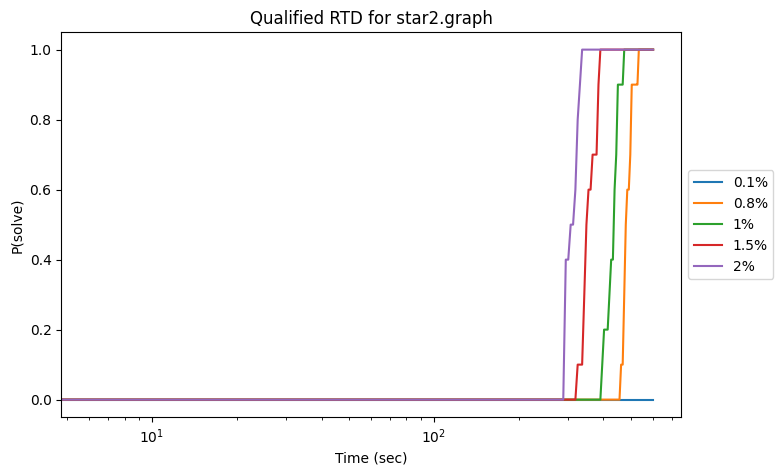

In [33]:
percents=[.1, .8, 1, 1.5, 2]
# percents=[0.05, .1, 0.5, .8, 1]
maxtime = np.max(record_time[dataset])
interval = maxtime/100.0
optimal = opt_cutoff[dataset]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
x = np.arange(0,maxtime+interval,interval)
for p in percents:
    c = optimal + (optimal * p/100.0)
    y = []
    for xval in x:
        num_runs = 0
        num_solutions = 0
#         for tfile in os.listdir(tracefile):
        for tfile in glob.glob(trace_files_path):
            result = readfile(tfile, c, xval)
            num_runs += 1
            if result:
                num_solutions += 1
        y.append(num_solutions/float(num_runs))
    # plot
    ax.semilogx(x,y,label=str(p)+"%")

# making plot look pretty
ax.set_xlabel('Time (sec)')
ax.set_ylabel('P(solve)')
ax.set_title(f"Qualified RTD for {dataset}.graph")
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
lgd = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1,0.5))

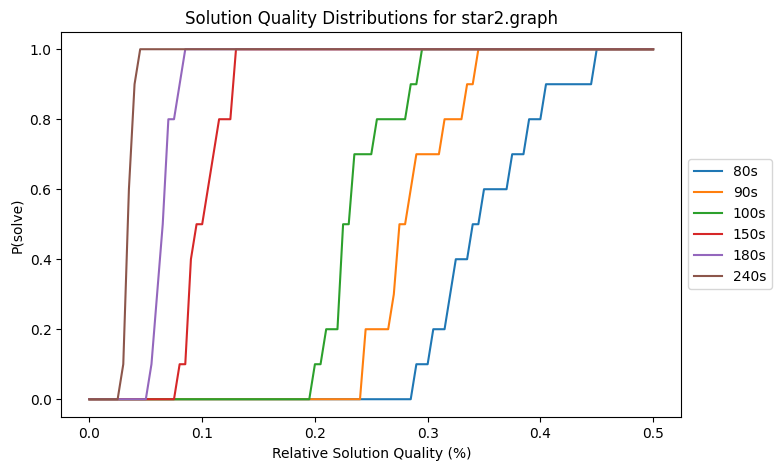

In [39]:
times=[80, 90, 100, 150, 180, 240]
# times=[10, 15, 20, 25, 30, 35]
# times=[10, 15, 20, 25, 30, 60, 100, 120]
maxquality = 0.5
interval = maxquality/100.0
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(111)
x = np.arange(0,maxquality+interval,interval)
for t in times:
    y = []
    for xval in x:
        c = (xval + 1) * optimal
        num_runs = 0
        num_solutions = 0
        for tfile in glob.glob(trace_files_path):
            result = readfile(tfile, c, t)
            num_runs += 1
            if result:
                num_solutions += 1
                
        y.append(num_solutions/float(num_runs))
    # plot
    ax.plot(x,y,label=str(t)+"s")

# making plot look pretty
ax.set_xlabel('Relative Solution Quality (%)')
ax.set_ylabel('P(solve)')
ax.set_title(f"Solution Quality Distributions for {dataset}.graph")
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
lgd = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1,0.5))

In [22]:
algo = 'SA'
record_time, record_nV = {}, {}
for fn in glob.glob(trace_files_path):

    fin = open(fn, 'r').readlines()
    name = dataset
    try:
        if algo == 'approx':
            time, nV = fin[-1].split()
        else:
            split = fin[-1].split()
            time = split[0][:-1]
            nV = split[1]
    except:
        print (fn)
        continue

    time, nV = float(time), float(nV)
    if name not in record_time:
        record_time[name] = [time]
        record_nV[name] = [nV]
    else:
        record_time[name].append(time)
        record_nV[name].append(nV)

opt_cutoff = {'karate':14, 'football':94, 'jazz':158, 'email':594, 'delaunay':703,'netscience':899, \
      'power':2203,'as-22july06':3303,'hep-th':3926,'star2':4542,'star':6902}
for key in record_time.keys():
    opt_nv = opt_cutoff.get('{}'.format(key), 1e-15)
    err = (np.mean(record_nV[key]) - opt_nv)/opt_nv
    print ('{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(key, 
                                   np.mean(record_time[key]), np.std(record_time[key]), 
                                   np.mean(record_nV[key]), np.std(record_nV[key]), err, opt_nv))

power	26.766987800598145	0.0	2207.0	0.0	0.0018157058556513845	2203


Text(0, 0.5, 'Time (sec)')

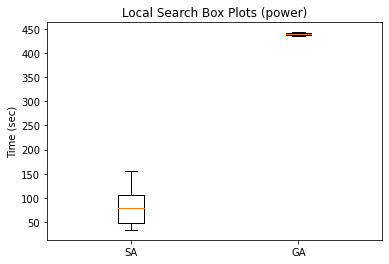

In [76]:
algo = 'SA'
record_time, record_nV = {}, {}
record_time_detail = {}
for fn in glob.glob('./{}_output/{}*.trace'.format(algo, dataset))[:]:
    sub_detail = {}
    fin = open(fn, 'r').readlines()
    name = fn.split('/')[-1].split('_')[0]
    try:
        if algo == 'approx':
            time, nV = fin[-1].split()
        else:
            time, nV = fin[-1].split()[0].split(',')
    except:
        print (fn)
        continue

    time, nV = float(time), float(nV)
    if name not in record_time:
        record_time[name] = [time]
        record_nV[name] = [nV]
    else:
        record_time[name].append(time)
        record_nV[name].append(nV)
ls1 = np.array(record_time[dataset])

algo = 'GA'
record_time, record_nV = {}, {}
record_time_detail = {}
for fn in glob.glob('./{}_output/{}*.trace'.format(algo, dataset))[:]:
    sub_detail = {}
    fin = open(fn, 'r').readlines()
    name = fn.split('/')[-1].split('_')[0]
    try:
        if algo == 'approx':
            time, nV = fin[-1].split()
        else:
            time, nV = fin[-1].split()[0].split(',')
    except:
        print (fn)
        continue

    time, nV = float(time), float(nV)
    if name not in record_time:
        record_time[name] = [time]
        record_nV[name] = [nV]
    else:
        record_time[name].append(time)
        record_nV[name].append(nV)
ls2 = np.array(record_time[dataset])

        
fig1, ax1 = plt.subplots()
ax1.set_title('Plot')
ax1.boxplot([ls1, ls2])
plt.xticks([1, 2], ['SA', 'GA'])
plt.title('Local Search Box Plots (power)')
plt.ylabel('Time (sec)')
# plt.figure(figsize = (6,8))
# ax1.set_title('Plot')
# df_plot = pd.DataFrame({'SA':ls1 , 'GA': ls2})
# df_plot_melt = pd.melt(df_plot)

# sns.boxplot(x = 'variable', y = 'value',data = df_plot_melt, width = .1)
# plt.tight_layout()